1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [11]:
import pandas as pd

file_path = r'D:\open_rank_20236.csv' 
df = pd.read_csv(file_path)
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df_top_100 = df.nlargest(100, 'rank')
max_value=df_top_100['value'].max()
min_value=df_top_100['value'].min()
mean_value=df_top_100['value'].mean()
median_value=df_top_100['value'].median()
print(f"最大值:{max_value}")
print(f"最小值:{min_value}")
print(f"均值:{mean_value}")
print(f"中位数:{median_value}")

最大值:1394.45
最小值:200.68
均值:346.9679
中位数:273.66999999999996


2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率

In [27]:
import pandas as pd

file_path = r'D:\activity_2022.csv'
df = pd.read_csv(file_path)
value_columns = [col for col in df.columns if col.endswith('_value')]  # 获取所有以 '_value' 结尾的列
df_selected = df.iloc[1:11]
df_selected['annual_growth_rate'] = (df_selected[value_columns[-1]] - df_selected[value_columns[0]]) / df_selected[value_columns[0]] * 100
average_annual_growth_rate_top_10 = df_selected['annual_growth_rate'].mean()
print(f"美国排名前十项目的每年的平均增长率: {average_annual_growth_rate_top_10:.2f}%")


美国排名前十项目的每年的平均增长率: -2.85%


C:\Users\肖\AppData\Local\Temp\ipykernel_22996\3321797501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['annual_growth_rate'] = (df_selected[value_columns[-1]] - df_selected[value_columns[0]]) / df_selected[value_columns[0]] * 100


3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [27]:
import pandas as pd

china_file_path = r'D:\china_2022.csv'
global_file_path = r'D:\global_2022.csv'
china_df = pd.read_csv(china_file_path)
global_df = pd.read_csv(global_file_path)
china_df_values = china_df.drop(columns=['name'])
global_df_values = global_df.drop(columns=['name'])
china_stats = china_df_values.describe()
global_stats = global_df_values.describe()
print("\n中国开源领域排名前十的统计指标：")
print(china_stats)
print("\n全球开源领域排名前十的统计指标：")
print(global_stats)
columns_to_compare = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'rank', 'value', 'rankDelta', 'valueDelta']
for col in columns_to_compare:
    mean_diff = china_stats.loc['mean', col] - global_stats.loc['mean', col]
    std_diff = china_stats.loc['std', col] - global_stats.loc['std', col]
    max_diff = china_stats.loc['max', col] - global_stats.loc['max', col]
    min_diff = china_stats.loc['min', col] - global_stats.loc['min', col]
    print(f"\n{col} 差异：")
    print(f"  均值差异: {mean_diff:.2f}")
    print(f"  标准差差异: {std_diff:.2f}")
    print(f"  最大值差异: {max_diff:.2f}")
    print(f"  最小值差异: {min_diff:.2f}")



中国开源领域排名前十的统计指标：
       issue_comment    open_issue     open_pull  review_comment  \
count      10.000000     10.000000     10.000000        10.00000   
mean    61205.500000   9169.200000  16912.700000     19857.50000   
std     49332.487917   6810.653563  10068.922805     21115.07349   
min     11741.000000    752.000000   1823.000000      2113.00000   
25%     30943.500000   4625.250000   9376.750000      3120.00000   
50%     39141.000000   6889.500000  15953.000000     10851.00000   
75%     82179.500000  14225.500000  22483.250000     31507.75000   
max    167814.000000  22397.000000  35266.000000     60402.00000   

        merged_pull      rank         value  rankDelta    valueDelta  
count     10.000000  10.00000      10.00000  10.000000     10.000000  
mean   13764.100000   5.50000   40269.53400   5.300000   9265.007000  
std     7692.752064   3.02765   30905.17181   9.944848   5327.824003  
min     1165.000000   1.00000   12033.71000   0.000000   2329.360000  
25%     8067.2

4.贝叶斯定理
根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [2]:
P_non_software = 0.25  # 非软件型项目的概率
P_html_markdown_given_non_software = 0.85  # 非软件型项目中带有 HTML/Markdown 标签的概率
P_html_markdown_given_software = 0.10  # 软件型项目中带有 HTML/Markdown 标签的概率
P_software = 0.75  # 软件型项目的概率

# 计算 P(HTML/Markdown 标签)
P_html_markdown = (P_html_markdown_given_non_software * P_non_software) + (P_html_markdown_given_software * P_software)

# 使用贝叶斯定理计算 P(非软件型项目 | HTML/Markdown 标签)
P_non_software_given_html = (P_html_markdown_given_non_software * P_non_software) / P_html_markdown

print(f"已知项目带有 HTML/Markdown 标签，该项目是非软件型项目的概率: {P_non_software_given_html:.4f}")


已知项目带有 HTML/Markdown 标签，该项目是非软件型项目的概率: 0.7391


5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [3]:
P_tool_component = 0.50  # 工具组件型项目的概率
P_javascript_given_tool_component = 0.35  # 工具组件型项目中使用 JavaScript 的概率
P_javascript_given_non_tool_component = 0.10  # 非工具组件型项目中使用 JavaScript 的概率
P_non_tool_component = 0.50  # 非工具组件型项目的概率

# 计算 P(JavaScript)
P_javascript = (P_javascript_given_tool_component * P_tool_component) + (P_javascript_given_non_tool_component * P_non_tool_component)

# 使用贝叶斯定理计算 P(工具组件型项目 | JavaScript)
P_tool_component_given_javascript = (P_javascript_given_tool_component * P_tool_component) / P_javascript

# 输出结果
print(f"已知项目是由 JavaScript 编写，该项目是工具组件型项目的概率: {P_tool_component_given_javascript:.4f}")


已知项目是由 JavaScript 编写，该项目是工具组件型项目的概率: 0.7778


6.根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

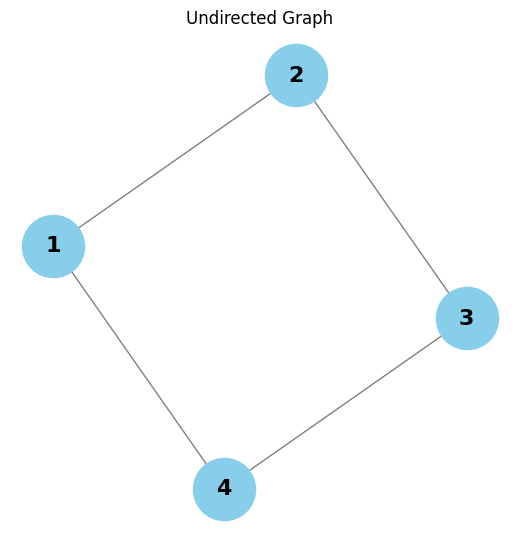

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

user=[1,2,3,4]
edges=[(1,2),(2,3),(3,4),(4,1)]

G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edges)

plt.figure(figsize=(5, 5)) 
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, font_size=16, font_weight='bold', edge_color='gray')
plt.title("Undirected Graph")
plt.show()


7.根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

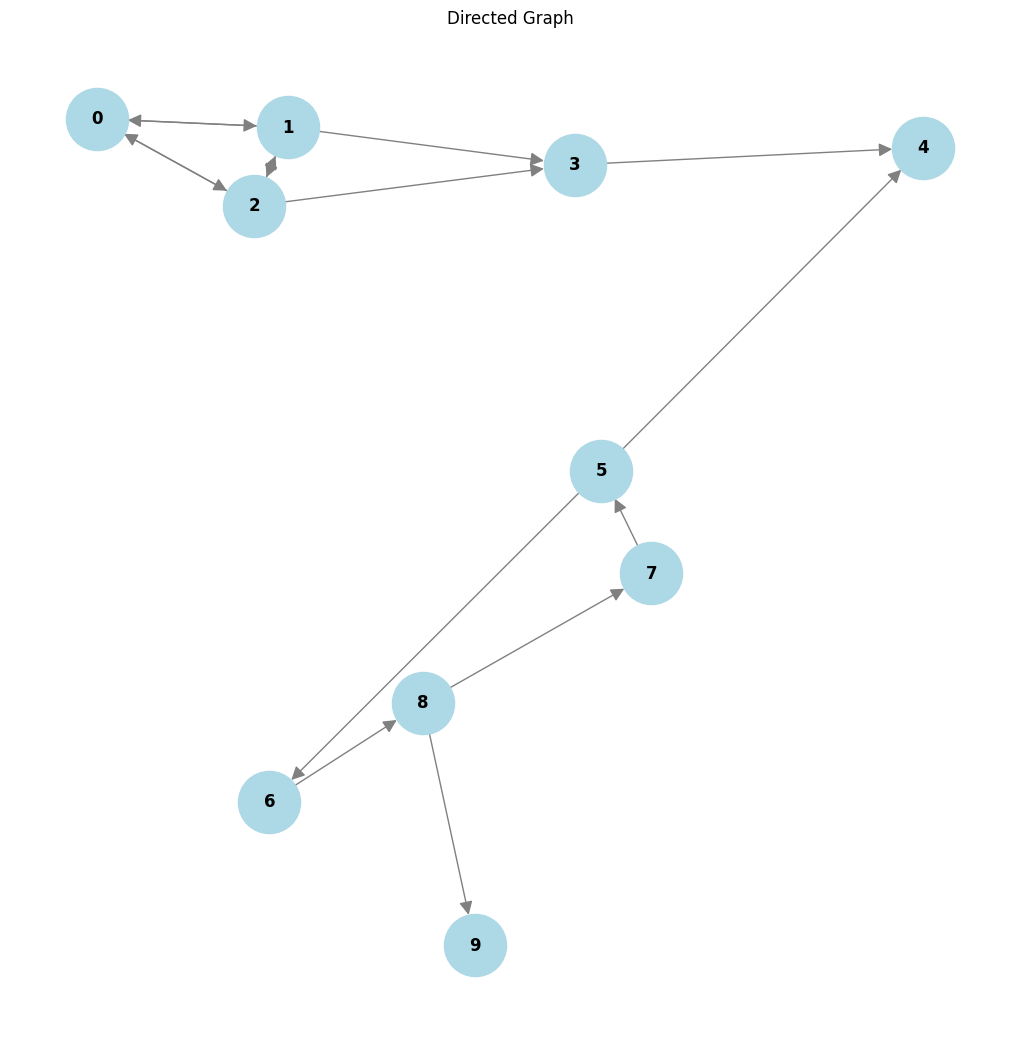

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0,1,2,3,4,5,6,7,8,9]
edges = [(0,1),(1,0),(0,2),(2,0),(1,2),(2,1),(1,3),(2,3),(3,4),(5,4), 
         (5,6),(7,5),(6,8),(8,7),(8,9)]
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)
plt.figure(figsize=(10, 10)) 
pos = nx.spring_layout(G, seed=42,k=0.5) 
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold', 
        edge_color='gray', arrowsize=20)
plt.title("Directed Graph")
plt.show()

8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。

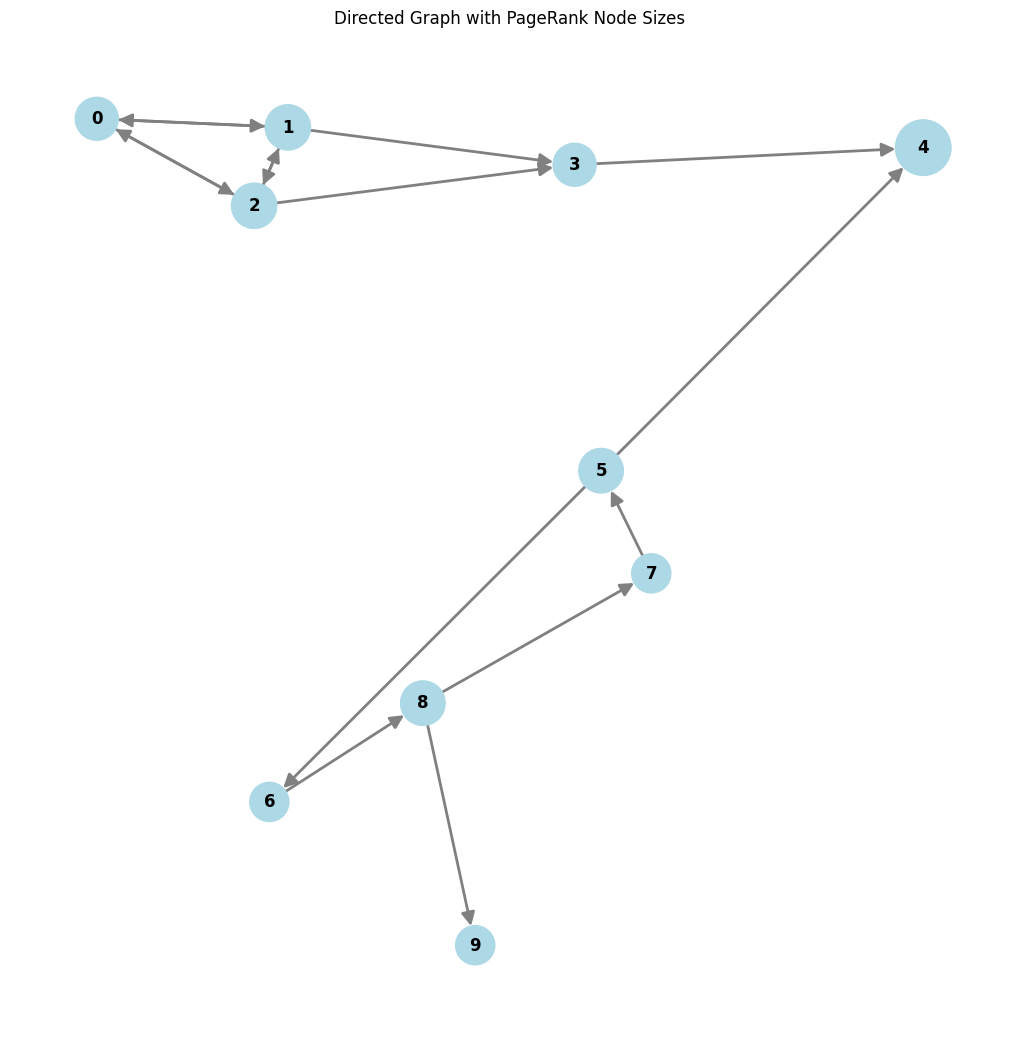

Node 0: PageRank = 0.0950
Node 1: PageRank = 0.1055
Node 2: PageRank = 0.1055
Node 3: PageRank = 0.0950
Node 4: PageRank = 0.1593
Node 5: PageRank = 0.1020
Node 6: PageRank = 0.0786
Node 7: PageRank = 0.0786
Node 8: PageRank = 0.1020
Node 9: PageRank = 0.0786


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

users = [0,1,2,3,4,5,6,7,8,9]
edges = [(0,1),(1,0),(0,2),(2,0),(1,2),(2,1),(1,3),(2,3),(3,4),(5,4), 
         (5,6),(7,5),(6,8),(8,7),(8,9)]
G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)
pagerank_values = nx.pagerank(G)
# 根据 PageRank 调整节点大小
# 将 PageRank 值映射到适当的节点大小范围
min_size = 10  
max_size = 10000
node_sizes = [min_size + (pagerank_values[node] * (max_size - min_size)) for node in G.nodes()]
plt.figure(figsize=(10, 10))  
pos = nx.spring_layout(G, seed=42, k=0.5)  

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_sizes, font_size=12, font_weight='bold', 
        edge_color='gray', arrowsize=20, width=2)

plt.title("Directed Graph with PageRank Node Sizes")
plt.show()

for node, rank in pagerank_values.items():
    print(f"Node {node}: PageRank = {rank:.4f}")
